In [2]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import time

In [3]:
dataframe = pd.read_csv('C:\\Users\\Hitesh\\Downloads\\lab3.csv',nrows = 100)
dataframe.head()

,BMI,4. Age (in years),5. Height (in cms),6. Weight (in kgs),Financial insecurity faced due to lockdown,Is not being able to hangout and meet your friends and classmates in any way affecting your mental health?,quarantine impact,When did you have more free time?,How many days in a week do you practice meditation?,"19. Out of the following, choose 5 tools which you use most often these days.",happy with online classes,How would you rate your mental well being ?,mentalh_level,to
0,27.887617,45,155.0,67.0,6,1,1,0,1,11,0,5,Bad,0.002789
1,26.609713,20,169.0,76.0,1,1,1,0,0,11,1,10,Good,0.002661
2,20.613131,23,151.0,47.0,3,1,1,2,0,11,1,5,Bad,0.002061
3,21.224490,19,175.0,65.0,2,1,0,2,0,12,0,7,Good,0.002122
4,17.959184,20,175.0,55.0,8,1,0,0,0,17,0,4,Bad,0.001796


In [4]:
from sklearn import preprocessing
l_b=preprocessing.LabelEncoder()
dataframe['mentalh_level']=l_b.fit_transform(dataframe['mentalh_level'])
dataframe.head()

,BMI,4. Age (in years),5. Height (in cms),6. Weight (in kgs),Financial insecurity faced due to lockdown,Is not being able to hangout and meet your friends and classmates in any way affecting your mental health?,quarantine impact,When did you have more free time?,How many days in a week do you practice meditation?,"19. Out of the following, choose 5 tools which you use most often these days.",happy with online classes,How would you rate your mental well being ?,mentalh_level,to
0,27.887617,45,155.0,67.0,6,1,1,0,1,11,0,5,0,0.002789
1,26.609713,20,169.0,76.0,1,1,1,0,0,11,1,10,1,0.002661
2,20.613131,23,151.0,47.0,3,1,1,2,0,11,1,5,0,0.002061
3,21.224490,19,175.0,65.0,2,1,0,2,0,12,0,7,1,0.002122
4,17.959184,20,175.0,55.0,8,1,0,0,0,17,0,4,0,0.001796


In [5]:

F_datafram=dataframe[['Is not being able to hangout and meet your friends and classmates in any way affecting your mental health?','quarantine impact','When did you have more free time?','happy with online classes',' How many days in a week do you practice meditation?']]
X=np.asarray(F_datafram)
y=np.asarray(dataframe['mentalh_level'])
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

A1

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5) 
kmeans.fit(X_train,y_train)  
print("The prediction of traiing data for k=5 : ",kmeans.predict(X_train,y_train))

The prediction of traiing data for k=5 :  [0 0 0 3 2 0 4 0 4 2 0 3 2 2 1 0 2 2 4 2 0 4 3 4 1 2 1 1 2 2 2 4 4 3 4 3 0
 0 2 2 0 3 3 0 1 0 3 1 0 2 4 3 2 2 0 2 1 4 2 4 0 0 4 2 1 1 4 2 4 3 2 4 0 0
 2 0 0 0 2 4]


In [7]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X_train,y_train)  
print("The prediction of traiing data for k=3 : ",kmeans.predict(X_train,y_train))

The prediction of traiing data for k=3 :  [2 2 2 0 1 2 1 2 1 1 2 0 1 1 0 2 1 1 1 1 2 2 0 1 0 1 0 1 1 1 1 2 1 0 2 0 2
 2 1 1 2 0 0 2 0 2 0 0 2 1 1 0 1 1 2 1 0 2 1 2 2 2 1 1 1 0 1 1 2 0 1 2 2 2
 1 2 2 2 1 1]


A2

In [8]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in dataframe:
	# Building and fitting the model
	kmeans = KMeans(n_clusters=3) 
	kmeans.fit(X_train,y_train)  
	distortions.append(sum(np.min(cdist(X_train, kmeans.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeans.inertia_)

	mapping1[k] = sum(np.min(cdist(X_train, kmeans.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeans.inertia_
for key, val in mapping1.items():
	print("The ideal value of k based on average Euclidean distance from cluster center usong elbow method of ",f'{key} : {val}')


The ideal value of k based on average Euclidean distance from cluster center usong elbow method of  BMI : 0.9641603058882349
The ideal value of k based on average Euclidean distance from cluster center usong elbow method of  4. Age (in years) : 0.9641603058882349
The ideal value of k based on average Euclidean distance from cluster center usong elbow method of  5. Height (in cms) : 0.9641603058882349
The ideal value of k based on average Euclidean distance from cluster center usong elbow method of  6. Weight (in kgs) : 0.9641603058882349
The ideal value of k based on average Euclidean distance from cluster center usong elbow method of   Financial insecurity faced due to lockdown : 0.9641603058882349
The ideal value of k based on average Euclidean distance from cluster center usong elbow method of  Is not being able to hangout and meet your friends and classmates in any way affecting your mental health? : 0.9641603058882349
The ideal value of k based on average Euclidean distance from c

A3

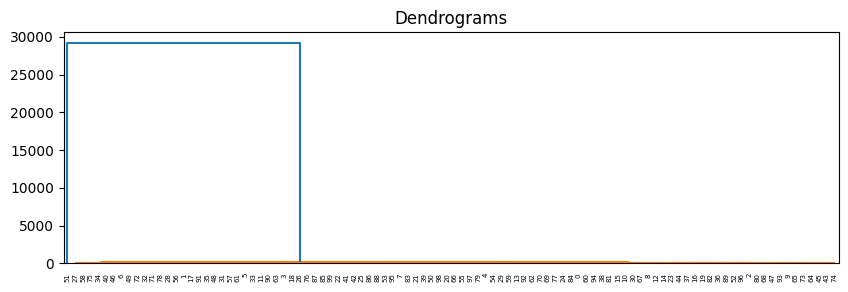

In [9]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 3))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dataframe, method='ward'))

In [10]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_train)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:

F_datafram=dataframe[['BMI']]
X=np.asarray(F_datafram)
y=np.asarray(dataframe['mentalh_level'])
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

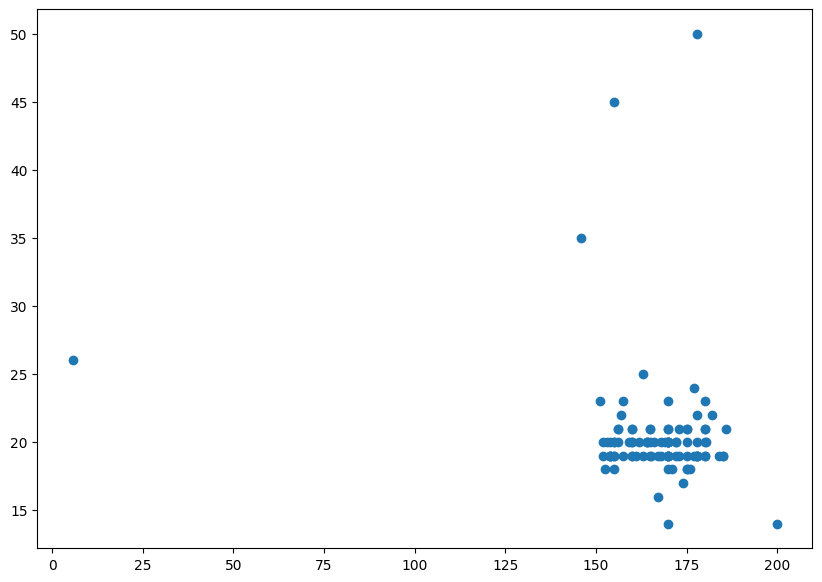

In [12]:
plt.figure(figsize=(10, 7))  
plt.scatter(dataframe['5. Height (in cms)'],dataframe['4. Age (in years)'])

A4

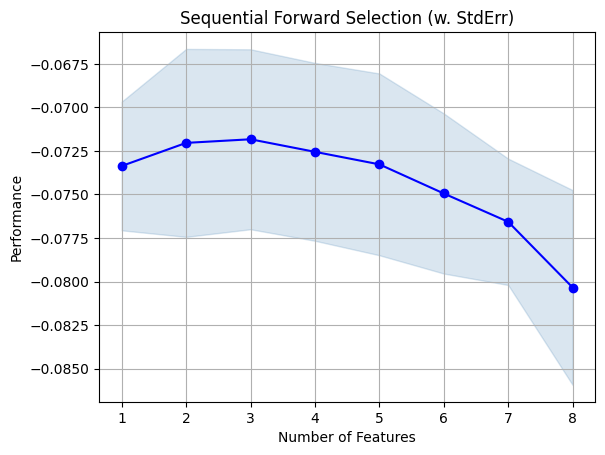

In [13]:
#Load needed libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

#import and prepare data
F_datafram=dataframe[['BMI','How would you rate your mental well being ?',' Financial insecurity faced due to lockdown','6. Weight (in kgs)','4. Age (in years)','5. Height (in cms)','Is not being able to hangout and meet your friends and classmates in any way affecting your mental health?','quarantine impact','When did you have more free time?','happy with online classes',' How many days in a week do you practice meditation?']]
X=np.asarray(F_datafram)
y=np.asarray(dataframe['mentalh_level'])

#Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(), 
          k_features=8, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

A5

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X,y)
print("The PCA components : \n",pca.components_)
print("The PCA variance : \n",pca.explained_variance_)

The PCA components : 
 [[ 9.99969279e-01 -9.70127152e-05 -7.26495661e-05  1.56567693e-04
   2.69598180e-04 -7.83077289e-03  1.90666791e-05 -3.42610945e-05
  -5.85170594e-05 -1.80322206e-05 -5.08506165e-05]]
The PCA variance : 
 [4287240.40525765]


A6

In [24]:
print("The transformed data : ",pca.fit_transform(X,y))
print("The accuracy of transformed data : ",pca.score(X,y))

The transformed data :  [[ -201.13329687]
 [ -202.52621279]
 [ -208.38516515]
 [ -207.96009294]
 [ -211.22662266]
 [ -206.30782687]
 [ -203.95649252]
 [ -210.64689973]
 [ -212.1753271 ]
 [ -203.72230744]
 [ -211.78085192]
 [ -206.6547535 ]
 [ -210.945741  ]
 [ -212.24938238]
 [ -210.04895617]
 [ -213.44585319]
 [ -207.3859402 ]
 [ -201.95777501]
 [ -206.44832056]
 [ -208.21900628]
 [ -208.94045684]
 [ -208.06122654]
 [ -208.38517409]
 [ -209.03580669]
 [ -201.09341355]
 [ -205.23087376]
 [ -207.96818038]
 [ -187.88213834]
 [ -199.73044598]
 [ -210.02138057]
 [ -211.26236127]
 [ -204.92346817]
 [ -197.49174459]
 [ -206.65352026]
 [ -203.94871843]
 [ -203.19249328]
 [ -208.36160021]
 [ -208.89270595]
 [ -213.4251252 ]
 [ -209.16200886]
 [ -205.30198534]
 [ -208.03891542]
 [ -208.88056258]
 [ -207.1937449 ]
 [ -207.94036602]
 [ -206.22132299]
 [ -203.57496115]
 [ -211.25490893]
 [ -202.84536522]
 [ -205.5355245 ]
 [ -208.61236814]
 [20498.54879545]
 [ -206.13701303]
 [ -212.3176307 ]
 [ -